<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/PromptsTop2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
my_path="/content/drive/MyDrive/CS491/Data/"

In [3]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00


In [4]:
from datasets import load_dataset

# Load the dataset
prompts = load_dataset("DIBT/10k_prompts_ranked")

all_prompts = prompts['train']['prompt']


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/10331 [00:00<?, ? examples/s]

In [5]:
!pip install top2vec -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.5 MB/s eta 0:00:00


In [13]:
##If model is already trained and saved (see section below) then this can be skipped!!
from top2vec import Top2Vec

# Assuming 'documents' is a list of text documents you wish to model
model = Top2Vec(all_prompts, embedding_model='doc2vec', speed='deep-learn')
#fast-learn, learn, deep-learn





2024-03-22 00:06:58,788 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-22 00:07:03,155 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-22 00:23:59,690 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-22 00:24:11,256 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-22 00:24:11,916 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


# Save model (and load) so we don't have to redo Top2Vec learning

In [14]:
import pickle

# Save variable
with open(my_path+'prompt_deep_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [15]:

# Load variable
with open(my_path+'prompt_deep_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Resume with topic analysis after retrieving model

In [16]:
model.get_num_topics()

133

In [30]:
model.get_topic_sizes()

(array([266, 246, 187, 176, 167, 148, 147, 131, 130, 125, 122, 116, 115,
        114, 112, 111, 111, 110, 104, 103, 101,  98,  97,  97,  96,  93,
         92,  91,  89,  89,  89,  88,  87,  85,  83,  83,  83,  83,  82,
         82,  81,  81,  81,  79,  79,  78,  78,  78,  78,  78,  77,  76,
         75,  75,  74,  74,  73,  72,  72,  72,  72,  71,  71,  71,  70,
         70,  70,  70,  70,  69,  69,  68,  68,  68,  67,  67,  67,  65,
         65,  65,  65,  65,  65,  64,  64,  64,  63,  63,  63,  62,  61,
         61,  61,  60,  60,  60,  60,  59,  59,  59,  59,  56,  55,  55,
         54,  54,  53,  53,  53,  53,  53,  52,  52,  51,  51,  49,  49,
         49,  48,  47,  47,  46,  45,  44,  43,  43,  42,  42,  39,  37,
         32,  27,  27]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42

In [34]:
model.topic_words[0]

array(['impact', 'implications', 'climate', 'potential', 'environmental',
       'economic', 'analysis', 'ethical', 'research', 'factors',
       'effects', 'examine', 'policy', 'effectiveness', 'findings',
       'strategies', 'consider', 'sources', 'provide', 'policies',
       'additionally', 'challenges', 'individuals', 'recommendations',
       'solutions', 'efforts', 'discuss', 'opportunities', 'influence',
       'comprehensive', 'explore', 'consequences', 'practices', 'various',
       'cultural', 'trends', 'promote', 'conduct', 'scientific', 'assess',
       'consumption', 'such', 'limitations', 'evaluate', 'levels',
       'analyze', 'organizations', 'including', 'sustainable', 'support'],
      dtype='<U15')

In [44]:
# Assuming 'model' is your trained Top2Vec model and 'keywords' is a list of keywords.
keywords = ["java","python"]
documents, document_score, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=10)

# This will return the top 10 most similar documents to the provided keywords,
# their similarity scores, and their IDs within the model.


In [45]:
# Print the results
for i in range(len(documents)):
    print(f"Document ID: {document_ids[i]}")
    print(f"Similarity Score: {document_score[i]}")
    print(f"Document Content: {documents[i][:200]}...")  # Print the first 200 characters to get an idea of the document content
    print("---")

Document ID: 5363
Similarity Score: 0.350351482629776
Document Content: You have been assigned the task of writing a program that determines the number of classes in a Java project. Your program should analyze a given Java codebase and count the number of classes present....
---
Document ID: 6946
Similarity Score: 0.33144673705101013
Document Content: Explain this Maven Spring Boot folder structure for folders and files that are not directly related to maven :
| .gitattributes
| .gitignore
| docker-compose.yml
| FOLDER\_STRUCTURE.md
| LICENSE.md
| ...
---
Document ID: 1055
Similarity Score: 0.31551575660705566
Document Content: code for add two number in java...
---
Document ID: 7531
Similarity Score: 0.30450087785720825
Document Content: how to take string input in java from scanner...
---
Document ID: 1441
Similarity Score: 0.2979806959629059
Document Content: write java code to create object from a grafana webhook alert...
---
Document ID: 7986
Similarity Score: 0.28470471501350403


In [43]:
import matplotlib.pyplot as plt
import numpy as np
import umap.umap_ as umap
# Assuming 'model' and 'umap_embeddings' are already defined and generated

# Get the document topics and other returned values if any
document_topics_info = model.get_documents_topics(model.document_ids, reduced=False)
document_topics = document_topics_info[1]  # Adjust based on the actual structure

# Define colors for the first three topics and light gray for the others
colors = ['red', 'green', 'blue'] + ['lightgray'] * (int(np.max(document_topics)) - 2)
# Create a color list for each document based on its topic
document_colors = [colors[topic] if topic < 3 else 'lightgray' for topic in document_topics]

# Proceed with plotting
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=document_colors, s=5)
plt.title('Document Clusters with Custom Colors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()



TypeError: list indices must be integers or slices, not numpy.float32

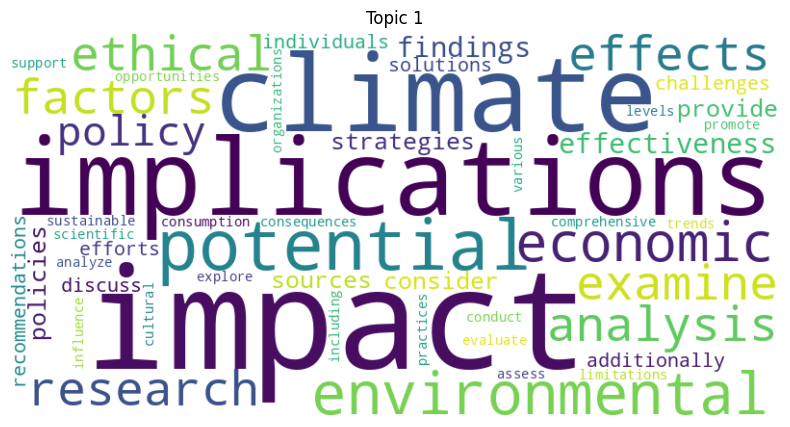

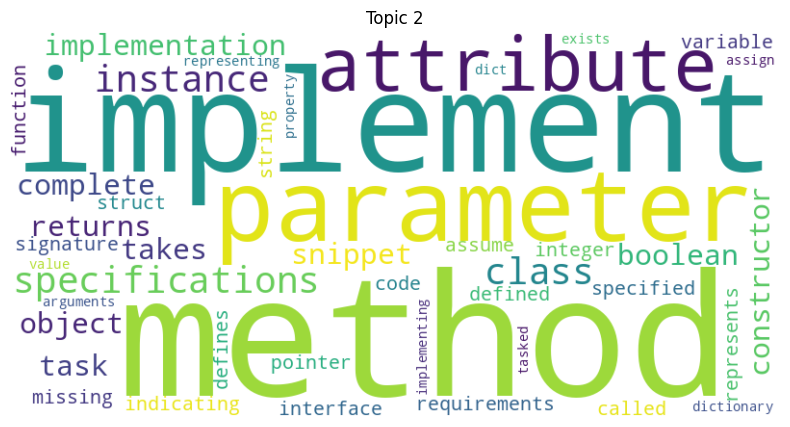

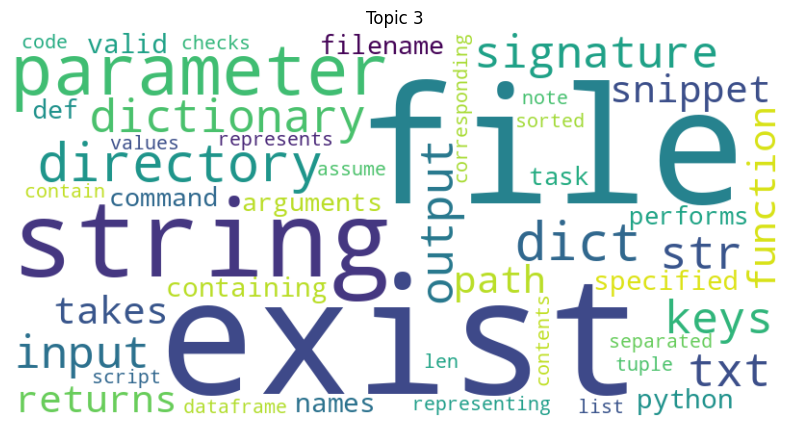

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

num_clouds=3
##print just num_clouds graphs, not all

for i in range(num_clouds):  # Loop through the two topics
    # Generate a single string with all words for the topic
    topic_words_combined = ' '.join(topics_words[i])

    # Generate the word cloud for this topic
    wordcloud = WordCloud(width=800, height=400,  # You can adjust the size to your liking
                          background_color='white',
                          min_font_size=10).generate(topic_words_combined)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))  # Adjust figsize to your liking
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Topic {i+1}')
    plt.show()  # Show the current figure before moving on to the next
